# Numpy

In [1]:
import numpy as np

## Arrays

Numpy arrays can be thought of as generalizations of lists. Instead of having one dimension along which they may have multiple entries, arrays can have arbitrarily many axes!

In [4]:
# we can initialise an array from a list
list1 = [1, 2, 3]
arr1 = np.array(list1)

list1

[1, 2, 3]

In [6]:
# this is exactly the same as skipping the intermediate assignment
arr1 = np.array([1, 2, 3])
arr1

array([1, 2, 3])

In [9]:
# here's an example of a multi-dimensional array
# each sublist is a row in this 2-D array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
# higher-dimensional arrays can be thought of as stacking arrays
# of lower dimension
arr3 = np.array([arr2, [[7, 8, 9], [10, 11, 12]]])
arr3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [15]:
# the shape method returns a tuple of the number of dimensions along
# each axis of the array
print(f'arr1 shape: {arr1.shape}')
print(f'arr2 shape: {arr2.shape}')
print(f'arr3 shape: {arr3.shape}')

arr1 shape: (3,)
arr2 shape: (2, 3)
arr3 shape: (2, 2, 3)


We can also `reshape` arrays, changing their number of axes and dimensions along each axis (so long as the shape is compatible). 

You can check if the new shape is compatible beforehand by making sure that the number of dimensions along each axis for both the original and reshaped arrays sums to the same total.

In [22]:
# reshape can be called as a function or as a method
arr3_reshaped = np.reshape(arr3, (2, 6))

print(arr3)

arr3_reshaped = arr3.reshape((2, 6))

print(f'\nsame as:\n\n{arr3}')

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

same as:

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [23]:
# but incompatible shapes won't fly!

arr3_reshaped = arr3.reshape((2, 10))

ValueError: cannot reshape array of size 12 into shape (2,10)

Numpy also has utility functions that emulate functionality similar (but broader) to that provided by the Python `range` function. 

`arange` returns equally-spaced values within a given interval (inclusive of the start and exclusively of the stop). It has the following parameters:
1. **start** : number, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
2. **stop** : number
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
3. **step** : number, optional
    Spacing between values.  For any output `out`, this is the distance
    between two adjacent values, ``out[i+1] - out[i]``.  The default
    step size is 1.  If `step` is specified as a position argument,
    `start` must also be given.
    
`linspace` returns a given number of observations (inclusive of the start and stop), equally spaced, from a given interval. It has the following parameters:
1. **start** : scalar
    The starting value of the sequence.
2. **stop** : scalar
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
3. **num** : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.

In [45]:
# emulate range using arange

arng = np.arange(0, 10, 1)

print(arng)

# arange isn't constrained to integer values!
arng = np.arange(1.2, 7.87, 0.47)

print('\n', arng)

[0 1 2 3 4 5 6 7 8 9]

 [1.2  1.67 2.14 2.61 3.08 3.55 4.02 4.49 4.96 5.43 5.9  6.37 6.84 7.31
 7.78]


In [40]:
# emulate range using linspace

lspace = np.linspace(0, 9, 10)

print(lspace)

# a more interesting example

lspace = np.linspace(0.3, 11.2, 20)

print('\n', lspace)


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

 [ 0.3         0.87368421  1.44736842  2.02105263  2.59473684  3.16842105
  3.74210526  4.31578947  4.88947368  5.46315789  6.03684211  6.61052632
  7.18421053  7.75789474  8.33157895  8.90526316  9.47894737 10.05263158
 10.62631579 11.2       ]


Numpy also provides a number of utility functions to generate arrays in commonly used forms. A few of these are:

1. `ones` returns an array of the specified shape populated entirely with ones.

2. `zeros` returns an array of the specified shape, filled with zeros.

3. `eye` returns a 2D array with ones on the diagonal and zeros everywhere else

4. `diag` returns a 2D array with the given array on its diagonal and zeros elsewhere.

4. `repeat` repeats a number or each element in a sequence of numbers a given number of times in an array.

In [51]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [46]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [47]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [49]:
np.repeat([1, 2, 3, 4], 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

## Combining Arrays

Numpy provides a number of ways in which we can combine arrays to form new arrays.

Two of the key functions are `vstack` and `hstack`. These functions respectively stack arrays vertically (one on top of another) and horizontally (one alongside another).

You can see that this implies that `vstack` requires that the stacked arrays have the same number of rows, while `hstack` requires that the stacked arrays have the same number of columns.

In [58]:
# create a dataframe which we'll play around with stacking
arr = np.array([[1, 2, 3], [4, 5, 6]])

print('arr:\n', arr, '\n')

# lets stack the same array vertically
vstacked = np.vstack([arr, arr])

print('vstacked:\n', vstacked, '\n')

# lets stack the same array horizontally
hstacked = np.hstack([arr, arr])

print('hstacked:\n', hstacked, '\n')

arr:
 [[1 2 3]
 [4 5 6]] 

vstacked:
 [[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]] 

hstacked:
 [[1 2 3 1 2 3]
 [4 5 6 4 5 6]] 



## Operations and Arithmetic

Numpy arrays support element-wise arithmetic via a set of overloaded operators that you should be very familiar with (they simply perform the usual operations on each element of the given tensor).

1. `+` — element-wise addition
2. `-` — element-wise subtraction
3. `*` — element-wise multiplication
4. `/` — element-wise division
5. `**` — element-wise power

In [61]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print('addition:\n', x + y, '\n')
print('subtraction:\n', x - y, '\n')
print('multiplication:\n', x * y, '\n')
print('division:\n', x / y, '\n')
print('power:\n', x ** 2, '\n')

addition:
 [5 7 9] 

subtraction:
 [-3 -3 -3] 

multiplication:
 [ 4 10 18] 

division:
 [0.25 0.4  0.5 ] 

power:
 [1 4 9] 



We can also perform the **dot product** (which you may be familiar with):

$ \begin{bmatrix}x_1 \ x_2 \ x_3\end{bmatrix}
\cdot
\begin{bmatrix}y_1 \\ y_2 \\ y_3\end{bmatrix}
= x_1 y_1 + x_2 y_2 + x_3 y_3$

In [62]:
x.dot(y)

32

Taking the dot product implicitly transposes the first vector `x`. We can also achieve this through use of the transpose method for Numpy arrays.

Transposing an array permutes its axes: for a 2D array rows become columns and columns become rows (though order is maintained).

In [67]:
print('array shape:\n', arr.shape, '\n')
print('transposed array:\n', arr.T, '\n')
print('transposed array shape:\n', arr.T.shape, '\n')

array shape:
 (2, 3) 

transposed array:
 [[1 4]
 [2 5]
 [3 6]] 

transposed array shape:
 (3, 2) 



# Pandas 

Pandas is a Python tool for data manipulation as excellent as its name implies. Its chief contribution is a fast and efficient **Dataframe** object and API for data manipulation. It supports indexing, time-series and optimised merging and joining of dataframes.
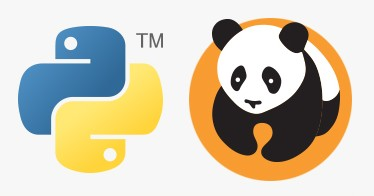
<div style="text-align:center;"></div>

## Series 

We can start in Pandas with a similar progression to Numpy and base python: starting with list-like structure with a single axis (which can have arbitrarily many dimensions along this axis), and progressing to a more complex datastructure with multiple axes.

Thankfully, the most common form of the more complex data structure is typically only encountered with two axes: rows and columns. But first lets consider the data structure with only a single axis of variation. 

At their most basic level, pandas series can be initialised with a list of aribitrary objects, and an (optionally) an index. Indexing is a very powerful feature in pandas, which we'll cover in more depth soon. If you don't specify an index for your series, Pandas will automatically assign an ascending integer index starting at zero.

In [2]:
# standard alias for the Pandas package
import pandas as pd

In [72]:
cities = pd.Series(['Cape Town', 'Paris', 'Joburg', None])
cities

0    Cape Town
1        Paris
2       Joburg
3         None
dtype: object

In [75]:
numbers = pd.Series(np.linspace(0, 1, 10))
numbers

0    0.000000
1    0.111111
2    0.222222
3    0.333333
4    0.444444
5    0.555556
6    0.666667
7    0.777778
8    0.888889
9    1.000000
dtype: float64

Notice in the above two examples the index was automatically assigned to our series. Let's now look at passing an index explicitly.

In [77]:
disordered = pd.Series([4, 2, 1 ,3], index=[3, 1, 0, 2])
disordered

3    4
1    2
0    1
2    3
dtype: int64

We can also use a dictionary to specify both the index and values for a series. 

In [79]:
capitals = pd.Series({'United Kingdom': 'London',
                      'Botswana': 'Gaborone',
                      'United Stated': 'Washington D.C.'})
capitals

United Kingdom             London
Botswana                 Gaborone
United Stated     Washington D.C.
dtype: object

Indices are incredibly useful, because they allow us to quickly and intuitively (especially if we've used a meaningful index) pick out relative data points.

The two most fundamental APIs for indexing are `loc` and `iloc`. Both are called as methods of the series, followed by an identifier for the desired index in square brackets. Mastering the use of `loc` and `iloc` early will set you in good stead for use of the Pandas data API.

1. There are two things you should know about `iloc`. Firstly, it is reserved for purely integer-based indexing. So if you ever call iloc with a non-integer index identifier, it will throw an error. Secondly, `iloc` **completely ignores the assigned index for the series**. It is based only on the order of entries in the dataframe. So `dataframe.iloc[0]` will always give you the first entry of your dataframe, irrespective of its index.
2. `loc` is based purely on the assigned index for your dataframe. If you call it with an index identifier that is not in the index it will throw an error, but otherwise it can be called with valid index identifiers **of the same data type as your assigned index**.


In [101]:
print(capitals.iloc[1])
print(capitals.loc['Botswana'])

Gaborone
Gaborone


You can use simple square brackets after your series, but avoid it. Its behaviour can be unexpected.

In [88]:
print(capitals[0])
# great, so it seems to function like iloc ...

custom_integer_indexed = pd.Series({1:2, 2:3})
print(custom_integer_indexed[0])
# until we have an integer-indexed dataframe, where it seems to
# function like loc

London


KeyError: 0

We can append link series along their common axis using the `append` method of Pandas series. The really interesting merge and join functionality, however, is best explored using dataframes.

In [91]:
series1 = pd.Series([0, 1, 1], index=[0, 1, 2])
series2 = pd.Series([2, 3, 5], index=[3, 4, 5])

fibonacci = series1.append(series2)
print(fibonacci)

0    0
1    1
2    1
3    2
4    3
5    5
dtype: int64

## Dataframes

Dataframes are the real powerhouse of Pandas. In general, series represent a number of observations on a single variable, such as the capital cities per country, or observations on a recurrent sequence. 

Dataframes represent observations on **multiple variables**. At a basic level, you can think of them as stacking series horizontally. The concept of indexing, however, remains very important. Each observation, represented by a row in a dataframe, should be a bundled group of measurements associated to a common index.

Let's build up an example of a dataframe in this way

In [98]:
observation1 = pd.Series({'name': 'Tim',
                          'framework': 'PyTorch',
                          'language': 'Python'})
observation2 = pd.Series({'name': 'Ricardo',
                          'framework': 'TensorFlow',
                          'language': 'Python'})
observation3 = pd.Series({'name': 'Cara',
                          'framework': 'Keras',
                          'language': 'R'})
df = pd.DataFrame([observation1, observation2, observation3])
df.head()

,name,framework,language
0,Tim,PyTorch,Python
1,Ricardo,TensorFlow,Python
2,Cara,Keras,R


In fact, it makes sense for `name` to be the index of this dataframe. Lets make it so.

In [99]:
df.set_index('name', inplace=True)
df.head()

,framework,language
name,,
Tim,PyTorch,Python
Ricardo,TensorFlow,Python
Cara,Keras,R


The `inplace` flag can be applied to many Pandas dataframe methods. As we saw with list methods in the introduction to Python, this means that the original dataframe is directly modified, and the method returns `None`. Be careful not to assign the result of a method called with `inplace = True`!

Indexing with `iloc` and `loc` works with exactly the same rules on dataframes as for series. However, instead of observations being on single values, observations are now on rows, or collections of values, and the result of accessing specific indices is now **a series being returned**.

In [107]:
print(df.iloc[0], '\n')

print(df.loc['Cara'])

framework    PyTorch
language      Python
Name: Tim, dtype: object 

framework    Keras
language         R
Name: Cara, dtype: object


In [111]:
print(type(df.iloc[0]), '\n')
print(type(df.loc['Cara']))

<class 'pandas.core.series.Series'> 

<class 'pandas.core.series.Series'>


Just like arrays, dataframes can be transposed:

In [112]:
df.T

name,Tim,Ricardo,Cara
framework,PyTorch,TensorFlow,Keras
language,Python,Python,R


We may want to select a specific value: a combination of both a row and a column. As we saw above: selecting a given row from the dataframe returns a series **indexed by the column names**. So, selecting rows first, we have:

In [118]:
df.loc['Cara'].loc['language']

'R'

We can group these together into a single `loc` call:

In [120]:
df.loc['Cara', 'language']

'R'

We can use integer-based indexing for rows and columns:

In [122]:
df.iloc[0, 1]

'Python'

Or we can use a combination of integer and index-based indexing:

In [123]:
df.iloc[0].loc['framework']

'PyTorch'

We can also select multiple rows or columns at once by passing a list into our indexing call:

In [124]:
df.loc[['Tim', 'Cara'], 'language']

name
Tim     Python
Cara         R
Name: language, dtype: object

## Data Manipulation and Loading

Here we'll dive into manipulating data in Pandas with data detailing results from a past Olympic games.

CSVs— comma-separated files are one of the most common forms of data you'll come into contact with. Pandas has a straightforward and optimised csv loader built into its API. 

In [4]:
df = pd.read_csv('/home/tim/Github/learning-materials/course_data/Pandas/olympics.csv')

All it took was passing the correct file path to the `read_csv` function. Similar `read` functions exist in Pandas for excel files, JSON files, text files, and many more.

In [126]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


A sidenote: the `head` method for a dataframe by default gives the first five rows of the dataframe (you can pass a specific number in the call if you want to see a different number). It's very helpful, especially with larger dataframe, as it prevents a barrage of output.

Unfortunately our input data file is badly formatted, and we'll have to specify slightly more intelligent arguments to the `read_csv` function.

In [131]:
df = pd.read_csv('/home/tim/Github/learning-materials/olympics.csv',
                 index_col=0, skiprows=1)
# use the first column as an index and ignore the 1st row

In [132]:
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Much better!

In [134]:
def rename_column(col):
    """
    Map a badly-formatted column name to a properly-formatted name.
    
    :param col: column name
    :returns: reformatted column name
    """
    if col[:2]=='01':
        output = 'Gold' + col[4:]
    elif col[:2]=='02':
        output = 'Silver' + col[4:]
    elif col[:2]=='03':
        output = 'Bronze' + col[4:]
    elif col[:1]=='№':
        output = '#' + col[1:] 
    else:
        output = col
    return output

df.rename(columns={col: rename_column(col) for col in df.columns},
          inplace=True)

In [136]:
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


A common scenario in the use of dataframes is the application of logical operators to the dataframe elements.

In [137]:
# operators with respect to one of the columns produce a series
# with the same index, but Boolean values
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

We can use these Boolean series to index the original dataframe, returning the rows where the logical condition is true, and omitting those rows where the logical condition is false.

In [139]:
gold_medallists = df[df['Gold'] > 0]
gold_medallists

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
Belarus (BLR),5,12,24,39,75,6,6,4,5,15,11,18,28,44,90
Belgium (BEL),25,37,52,53,142,20,1,1,3,5,45,38,53,56,147


We can also use more advanced element-wise logical operators on series. The operators evaluate the logical condiditions separately for each row in the series. Here are a few of them:

1. `>`, `>=`: greater than and greater than or equal to don't need much explanation (similarly for less than).
2. `|`: this represents the element-wise logical 'or' condition. It evaluates to true when at least one of the conditions on either side of this operator are true.
3. `&`: the element-wise logical 'and', which evaluates to true when both conditions on either side of the operator evaluate to true.

Lets for instance take a look at countries that won at least one silver in the summer olympics, but no golds:

In [142]:
df_conditional = df[(df['Gold'] == 0) & (df['Silver'] > 0)]

As an aside, it's good practice to be explicit with your brackets in logical statements. You don't lose anything and often end up avoiding subtle ambiguities (and therefore *bugs*)>

## Indexing Data 

Indices are a very useful tool for accessing our data, and we could very well be interested in changing the index for a given dataset, or even assigning multiple indexes. 

For unique indices, Pandas is lightning fast at performing look ups. For non-unique indices, there are important approaches that will speed up your data access.

Let play around with indices using some census data from the U.S.

In [177]:
df = pd.read_csv('course_data/Pandas/census.csv')

In [178]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


Here you can see that we have state names and city names. Lets go ahead and create a multi index on both state name and city name. As you can see below, this will be a non-unique index.

In [179]:
print(f"dataframe number of rows: {len(df)}")
print(f"unique states: {df['STNAME'].nunique()}")
print(f"dataframe number of rows: {df['CTYNAME'].nunique()}")

dataframe number of rows: 3193
unique states: 51
dataframe number of rows: 1927


In [180]:
df = df.set_index(['STNAME', 'CTYNAME'])

Now we can access data in a straightforward way by its state name and city name.

In [181]:
df.loc['Alabama', 'Bibb County']

/home/tim/.python3.6.4_general/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,SUMLEV,REGION,DIVISION,STATE,COUNTY,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,Bibb County,50,3,6,1,7,22915,22919,22861,22733,22642,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


We can also select multiple rows, in which case we pass as array of the index values as tuples:

In [182]:
df.loc[[('Wyoming', 'Sweetwater County'), ('Alabama', 'Bibb County')]]

,,SUMLEV,REGION,DIVISION,STATE,COUNTY,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,CTYNAME,,,,,,,,,,,,,,,,,,,,,
Wyoming,Sweetwater County,50,4,8,56,37,43806,43806,43593,44041,45104,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
Alabama,Bibb County,50,3,6,1,7,22915,22919,22861,22733,22642,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


Now lets do a quick comparison of indexing using a non-unique unsorted index compared to a non-unique index that has been sorted.

In [183]:
%%timeit -n 1000
df.loc['Wyoming', 'Sweetwater County']

/home/tim/.python3.6.4_general/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


360 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [184]:
# now sort the index
df.sort_index(inplace=True)

In [185]:
%%timeit -n 1000
df.loc['Wyoming', 'Sweetwater County']

318 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here we can see a marginal speed up in the query time. At around 3000 rows, this is a tiny dataframe, so the effect isn't huge. But in general, Pandas navigates a non-unique sorted index in logN time (where N is the number of rows), which without sorted, it takes on the order of N time.

## Missing Values (Imputation)

Now lets take a brief look at dealing with missing values in Pandas. Pandas has a lot of native functionality for this task built into dataframes. 

We'll dive into some information of user playback of video material.

In [188]:
df = pd.read_csv('course_data/Pandas/log.csv')

In [189]:
df.head()

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN


In [190]:
df.set_index(['time', 'user'], inplace=True)
df.sort_index(inplace=True)

In [192]:
df.head(20)

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN

A common approach to imputing missing values is to fill values forward from the last valid observation (having ordered the observations in time, of course).

One can also backfill missing values, and even interpolated linearly or otherwise between values (see the `interpolate` method for dataframes).

In [196]:
# here we forward fill missing values
df = df.fillna(method='ffill')
df.head(20)

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0

## Merging Dataframes 

We often deal with related data that we need to combine according to one or more columns. Let explore some of the many ways to approach this.

In [204]:
language_df = pd.DataFrame({'Name': ['Sizwe', 'Lauren', 'Michelle'],
                               'Language': ['Python', 'Javascript',
                                            'Julia']})
language_df.set_index('Name', inplace=True)
language_df

,Language
Name,
Sizwe,Python
Lauren,Javascript
Michelle,Julia


In [205]:
vocation_df = pd.DataFrame({'Name': ['Sizwe', 'Michelle', 'Tom'],
                            'Vocation': ['Data Scientist',
                                         'Epidemiologist','Economist']})
vocation_df.set_index('Name', inplace=True)
vocation_df

,Vocation
Name,
Sizwe,Data Scientist
Michelle,Epidemiologist
Tom,Economist


Outer joins take the union of indices across two dataframes, filling in the missing columns values with null values:

In [207]:
pd.merge(language_df, vocation_df, how='outer', left_index=True,
         right_index=True)

,Language,Vocation
Name,,
Lauren,Javascript,NaN
Michelle,Julia,Epidemiologist
Sizwe,Python,Data Scientist
Tom,NaN,Economist


Outer joins take the intersection of indices across the two dataframes, and doesn't create any new null values:

In [208]:
pd.merge(language_df, vocation_df, how='inner', left_index=True,
         right_index=True)

,Language,Vocation
Name,,
Sizwe,Python,Data Scientist
Michelle,Julia,Epidemiologist


Left joins retain all the index values in the left hand dataframe, filling in null values where necessary (identically and oppositely for right joins):

In [209]:
pd.merge(language_df, vocation_df, how='left', left_index=True,
         right_index=True)

,Language,Vocation
Name,,
Sizwe,Python,Data Scientist
Lauren,Javascript,NaN
Michelle,Julia,Epidemiologist


## Idiomatic Python

Idiomatic Python is basically Python code written in an elegant way, paying attention to the aesthetics and conventions of the language. Lets return to the census data.

In [211]:
df = pd.read_csv('course_data/Pandas/census.csv')

Here's an example of **method chaining** in Pandas:

In [218]:
df.where(df['SUMLEV']==50)\
  .dropna()\
  .set_index(['STNAME','CTYNAME'])\
  .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

The `apply` method is a powerful tool in Pandas, that allows arbitrary functions to be applied over each row of a dataframe, potentially returning a whole new dataframe.

In [219]:
def min_max(row):
    cols = ['POPESTIMATE2010',
            'POPESTIMATE2011',
            'POPESTIMATE2012',
            'POPESTIMATE2013',
            'POPESTIMATE2014',
            'POPESTIMATE2015']
    data = row[cols]
    return pd.Series({'min': np.min(data), 'max': np.max(data),
                      'min_year': cols[np.argmin(data)[0]],
                      'max_year': cols[np.argmax(data)[0]]})

In [220]:
df.apply(min_max, axis=1)

/home/tim/.python3.6.4_general/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/home/tim/.python3.6.4_general/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


,min,max,min_year,max_year
0,4785161,4858979,POPESTIMATE2010,POPESTIMATE2015
1,54660,55347,POPESTIMATE2010,POPESTIMATE2015
2,183193,203709,POPESTIMATE2010,POPESTIMATE2015
3,26489,27341,POPESTIMATE2015,POPESTIMATE2010
4,22512,22861,POPESTIMATE2013,POPESTIMATE2010
5,57373,57776,POPESTIMATE2010,POPESTIMATE2012
6,10606,10887,POPESTIMATE2012,POPESTIMATE2010
7,20154,20944,POPESTIMATE2015,POPESTIMATE2010
8,115620,118437,POPESTIMATE2015,POPESTIMATE2010
9,33993,34153,POPESTIMATE2011,POPESTIMATE2013


The `groupby` method is another integral tool for manipulating dataframes. It allows the dataframe to be aggregated according to one or more columns, and returns an iterable of the group names and the groups themselves. 

One can also apply one or many aggregation functions to the contents of each group to condense the results.

In [226]:
i = 0
for group_name, group in df.groupby(['STNAME', 'CTYNAME']):
    print(group_name, '\n')
    print(group.head(), '\n')
    print('##################### New Group #####################]\n')
    i += 1
    if i >= 4: break

('Alabama', 'Alabama') 

   SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME  CTYNAME  CENSUS2010POP  \
0      40       3         6      1       0  Alabama  Alabama        4779736   

   ESTIMATESBASE2010  POPESTIMATE2010     ...       RDOMESTICMIG2011  \
0            4780127          4785161     ...               0.002295   

   RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
0         -0.193196          0.381066          0.582002         -0.467369   

   RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
0     1.030015     0.826644     1.383282     1.724718     0.712594  

[1 rows x 100 columns] 

##################### New Group #####################]

('Alabama', 'Autauga County') 

   SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
1      50       3         6      1       1  Alabama  Autauga County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010     ...       \
1          54571              54571            54660

In [228]:
# now lets perform an aggregation
df.set_index('STNAME')\
  .groupby(level=0)['CENSUS2010POP']\
  .agg({'avg': np.average, 'sum': np.sum})

/home/tim/.python3.6.4_general/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg,sum
STNAME,,
Alabama,1.405805e+05,9559472
Alaska,4.734873e+04,1420462
Arizona,7.990021e+05,12784034
Arkansas,7.673468e+04,5831836
California,1.262846e+06,74507912
Colorado,1.547445e+05,10058392
Connecticut,7.942438e+05,7148194
Delaware,4.489670e+05,1795868
District of Columbia,6.017230e+05,1203446


In [231]:
# aggregation can also be column-dependent
df.set_index('STNAME')\
  .groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']\
  .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,1.407400e+05,9602216
Alaska,4.760140e+04,1445440
Arizona,8.010260e+05,12937464
Arkansas,7.690511e+04,5877076
California,1.265562e+06,75400068
Colorado,1.553309e+05,10238960
Connecticut,7.954927e+05,7179518
Delaware,4.498955e+05,1815832
District of Columbia,6.051260e+05,1240944


## Date and Time in Pandas

Pandas provides a great API and its own custom datetime and timedelta objects for working with date and time fields.

In [232]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [233]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,109,120
2016-10-16,110,128
2016-10-30,109,120
2016-11-13,113,123
2016-11-27,110,122
2016-12-11,116,120
2016-12-25,113,129
2017-01-08,116,115
2017-01-22,120,119


We can slice the index as we would for other data types:

In [237]:
df['2016-10-02':]

,Count 1,Count 2
2016-10-02,109,120
2016-10-16,110,128
2016-10-30,109,120
2016-11-13,113,123
2016-11-27,110,122
2016-12-11,116,120
2016-12-25,113,129
2017-01-08,116,115
2017-01-22,120,119


Let's do some quick manipulations using the timestamp and timedelta classes:

In [238]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [240]:
pd.Timestamp('9/3/2016') + pd.Timedelta(hours=10)

Timestamp('2016-09-03 10:00:00')